In [1]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

mkdir: cannot create directory ‘{HOME}/datasets’: No such file or directory
[Errno 2] No such file or directory: '{HOME}/datasets'
/content


In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="a24jF6tbAv4bhmPrLyHp")
project = rf.workspace("hai-ton-that-nky0r").project("bridge-damage-segmentation")
version = project.version(3)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Bridge-Damage-Segmentation-3 in yolov11:: 100%|██████████| 2000/2000 [00:00<00:00, 7030.34it/s]


In [3]:
!nvidia-smi

Tue Nov 26 03:36:55 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [5]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.37 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/112.6 GB disk)


In [6]:
%cd {HOME}

!yolo task=detect mode=train model=best.pt data={dataset.location}/data.yaml epochs=50 imgsz=640 plots=True

/content
Ultralytics 8.3.37 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=best.pt, data=/content/Bridge-Damage-Segmentation-3/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True,

In [7]:
# !pwd

In [8]:
# %cd {HOME}

# !yolo task=detect mode=train model=runs/detect/train2/weights/last.pt data={dataset.location}/data.yaml epochs=80 imgsz=640 plots=True

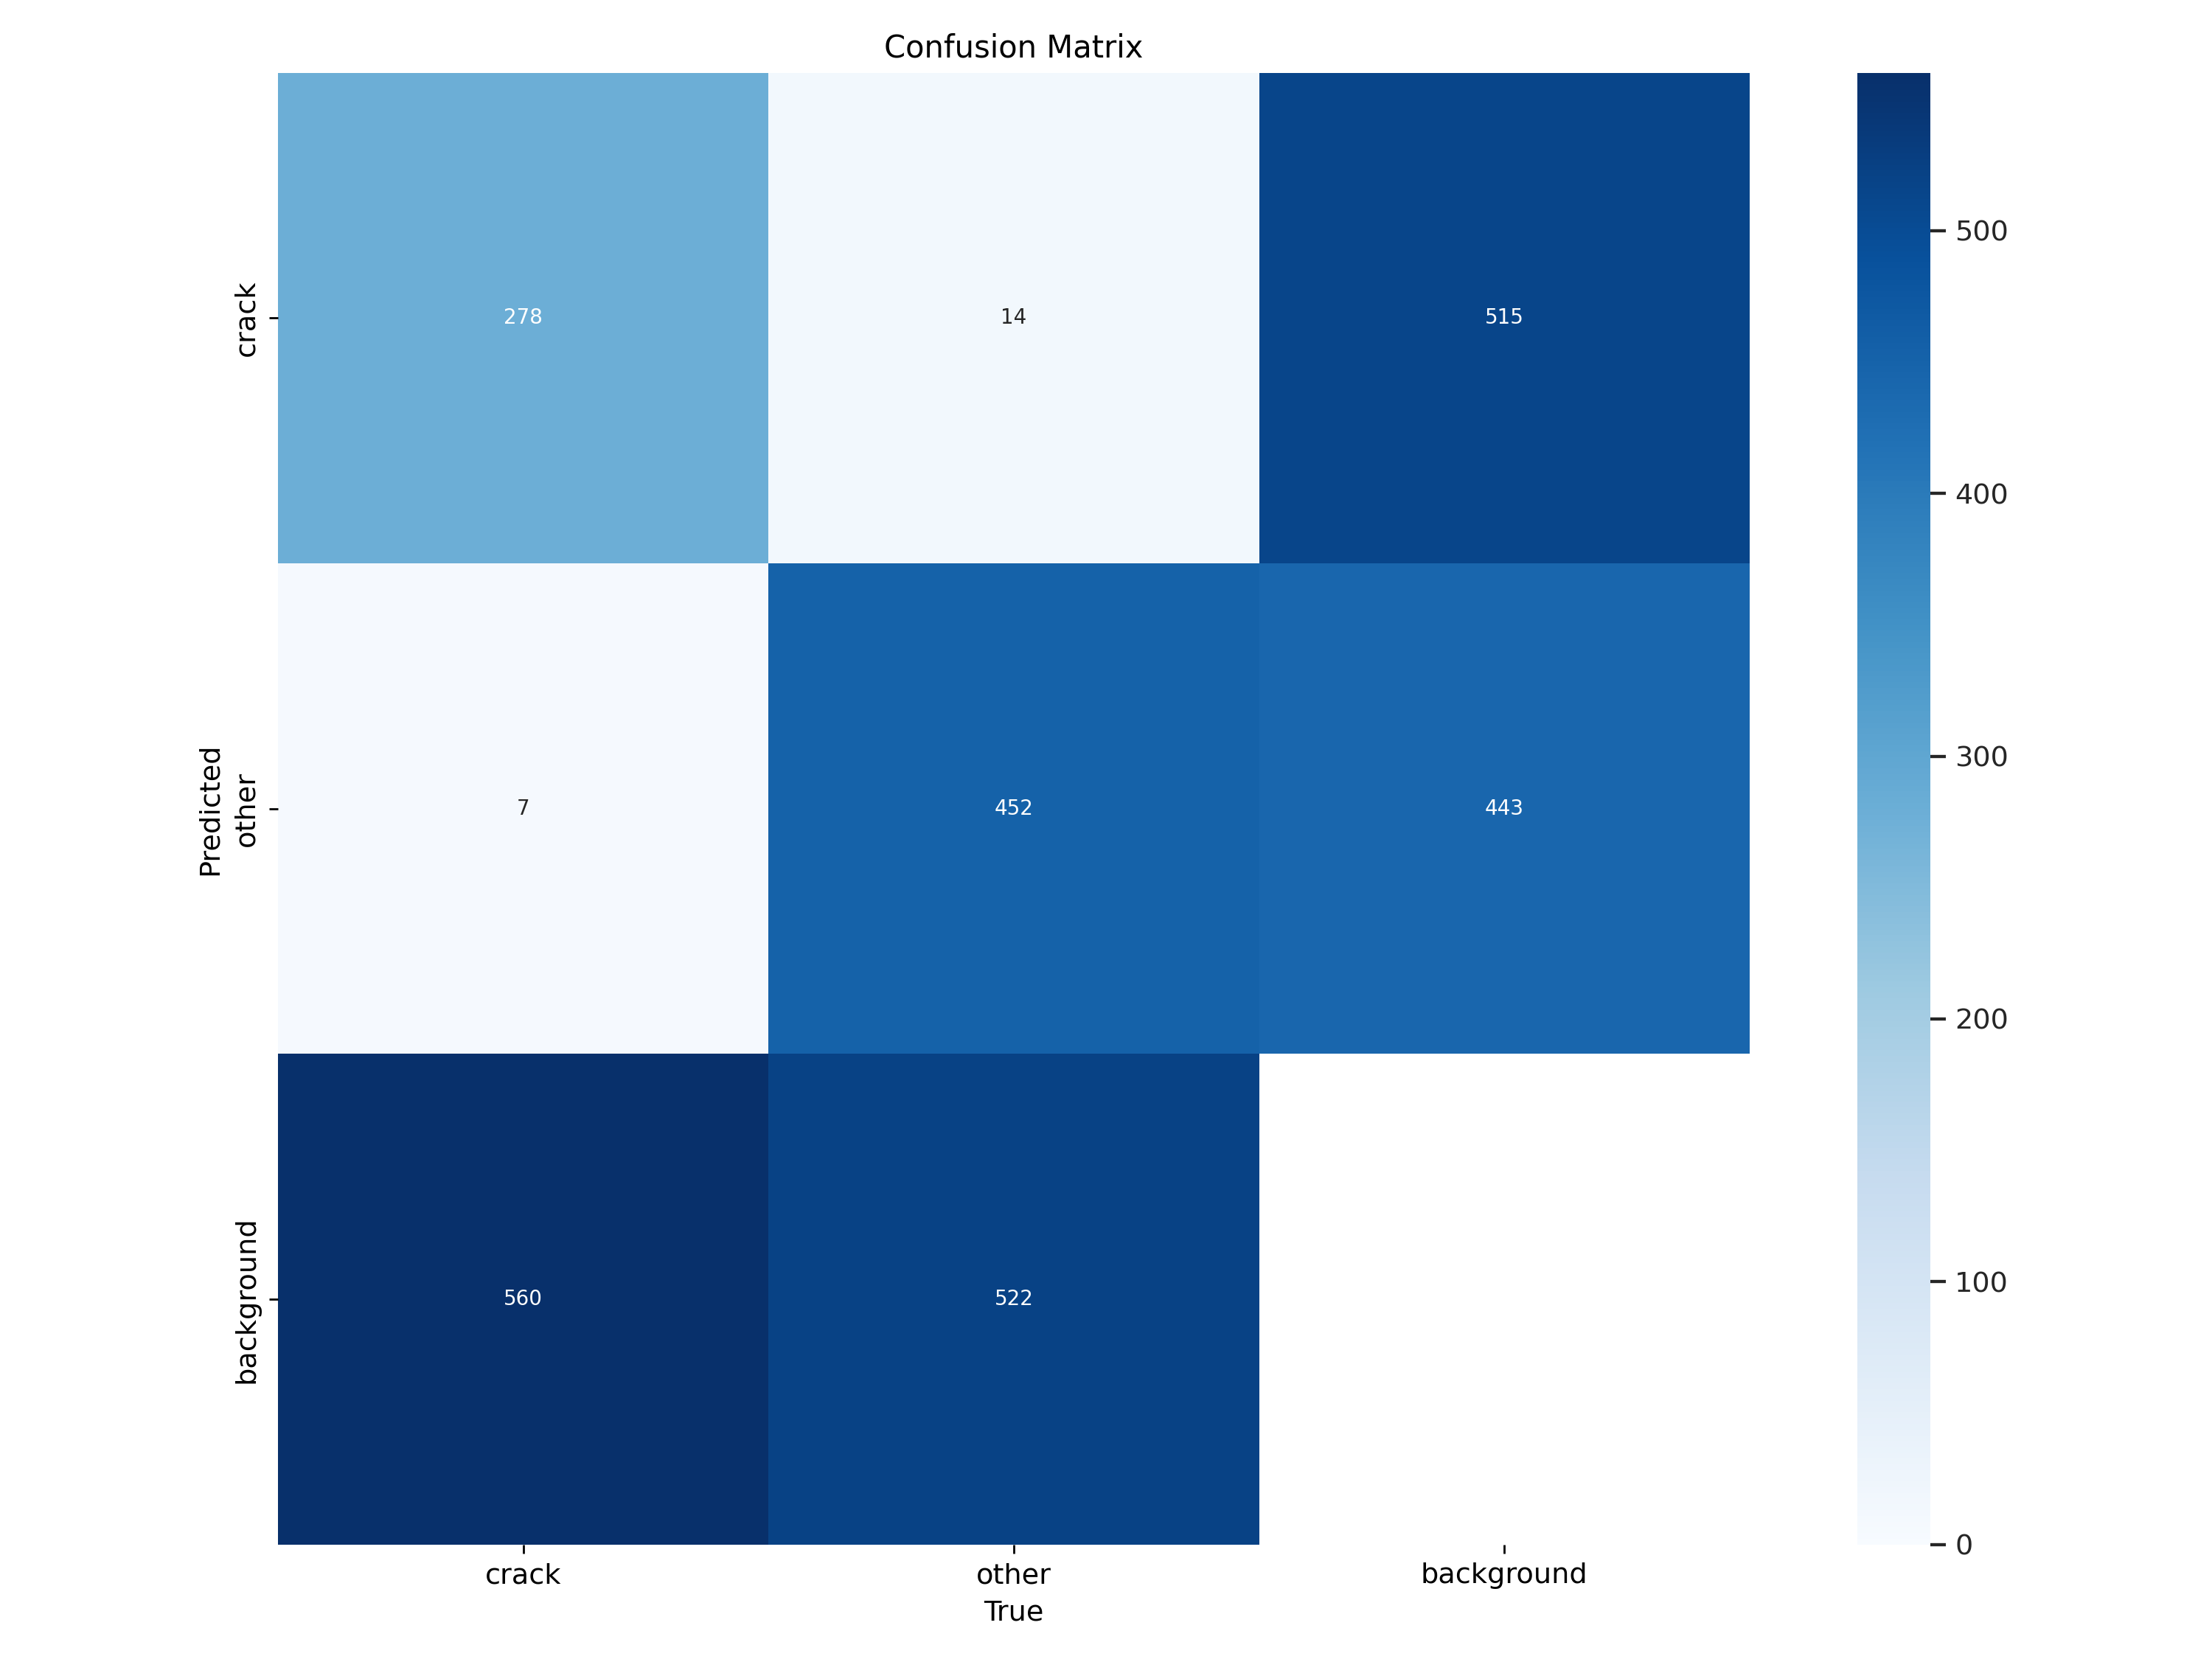

In [9]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

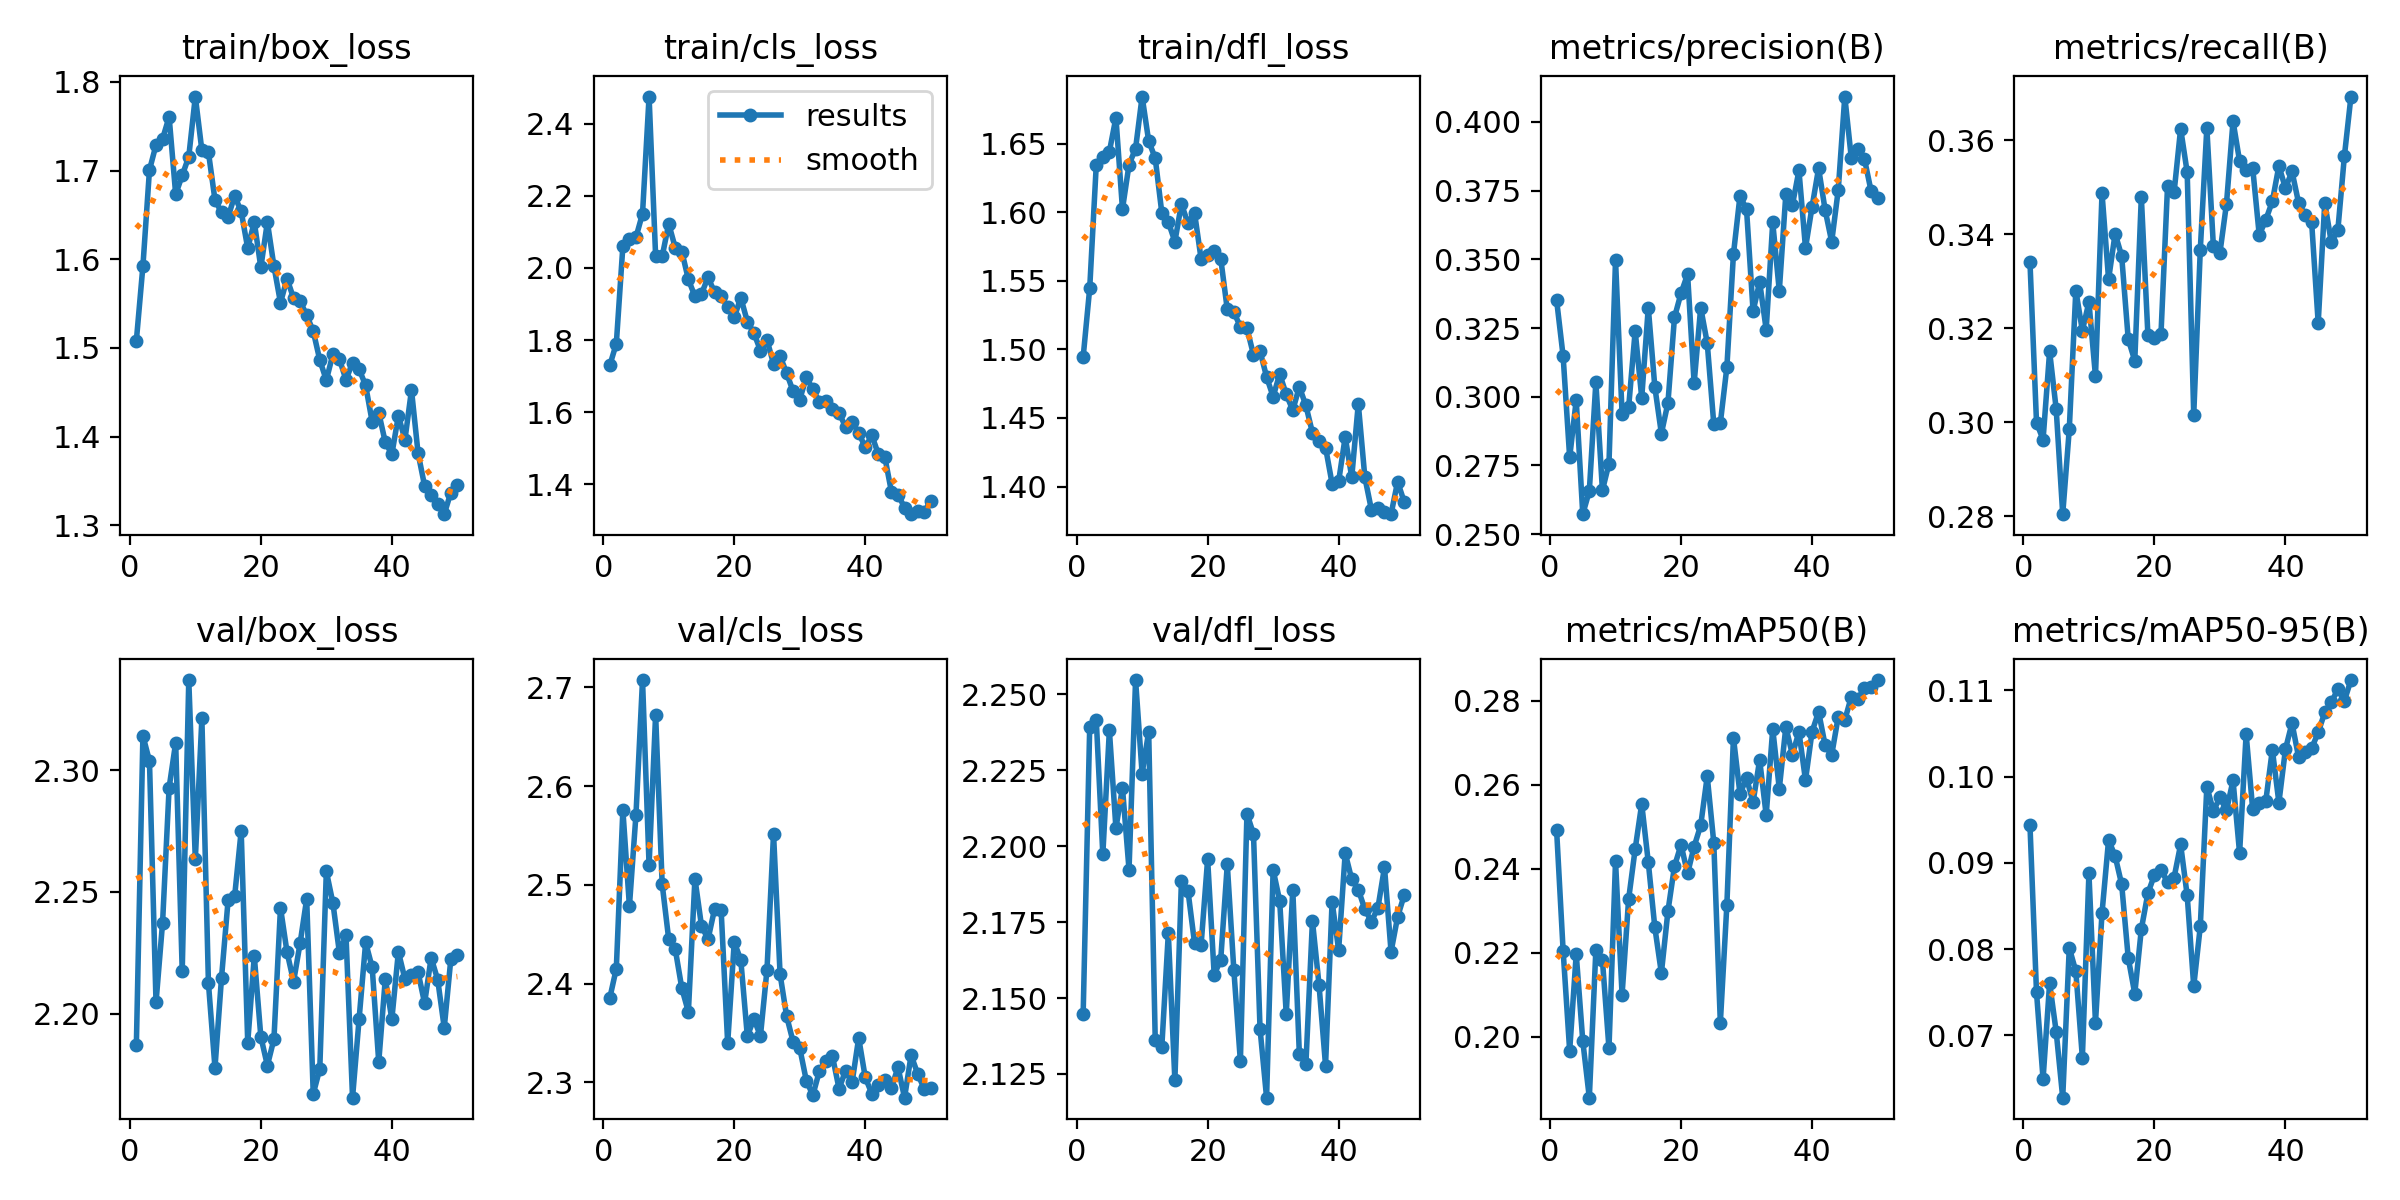

In [10]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

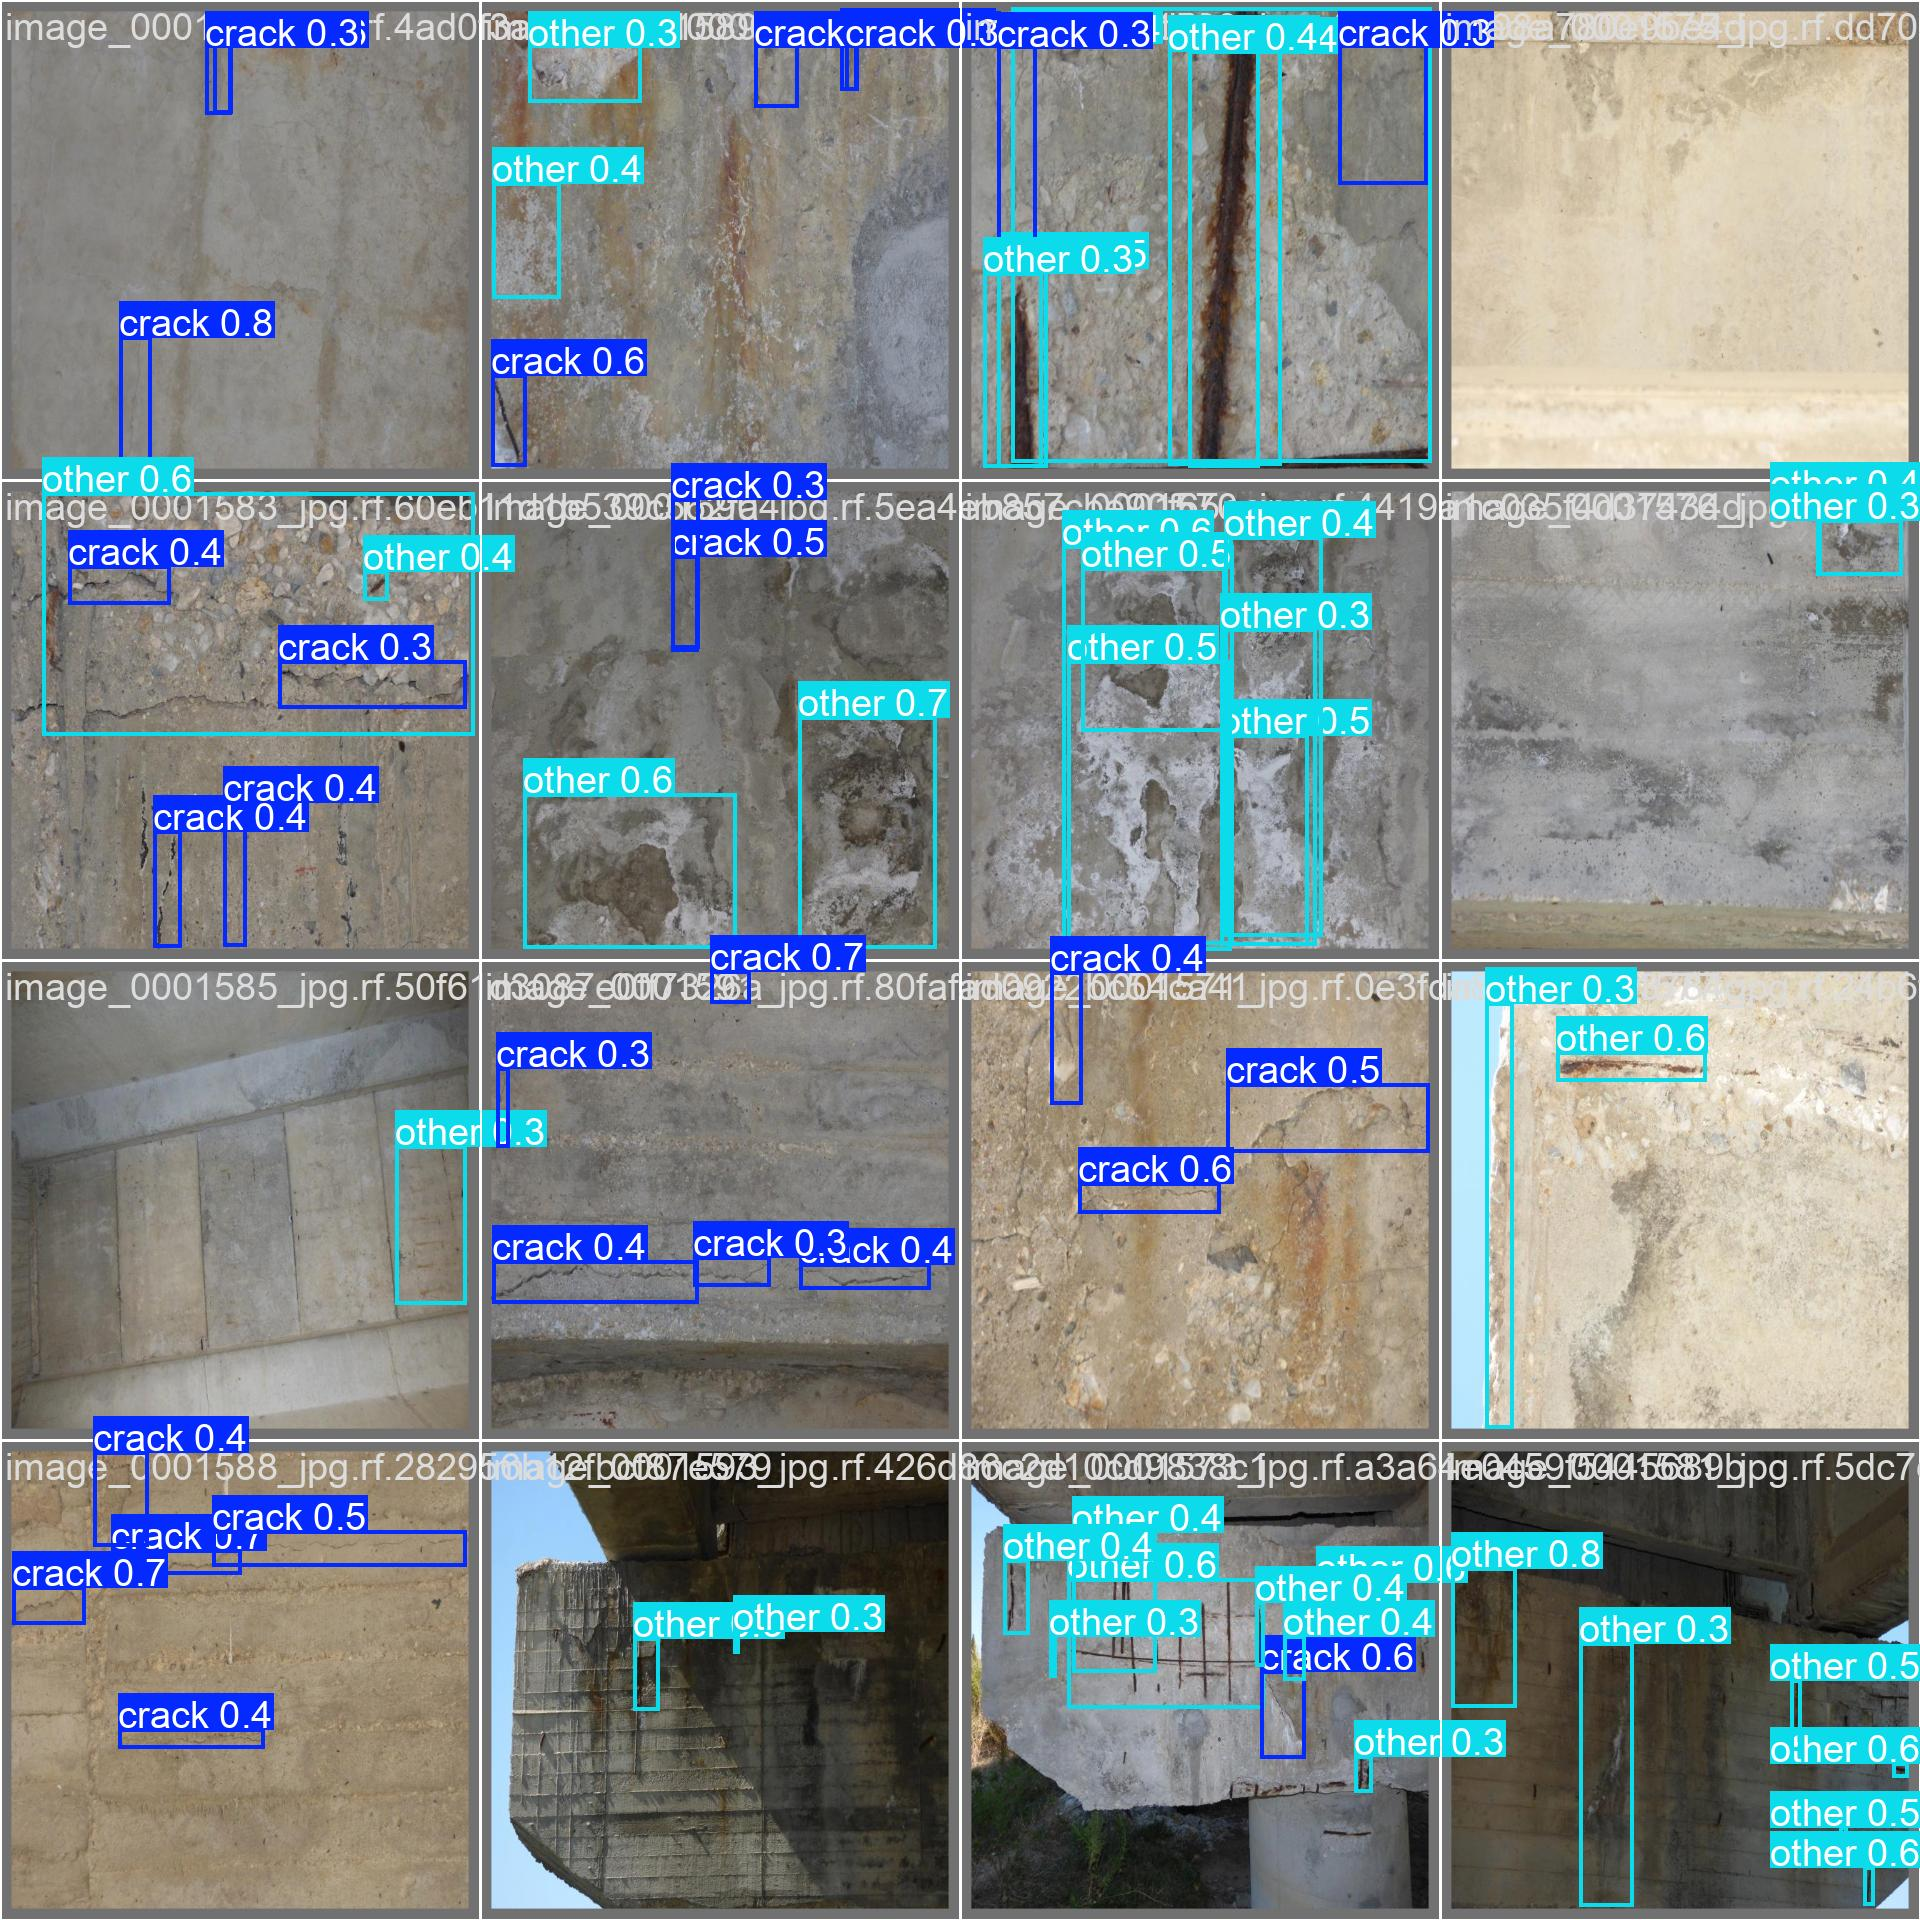

In [11]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [12]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.37 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/Bridge-Damage-Segmentation-3/valid/labels.cache... 294 images, 1 backgrounds, 0 corrupt: 100% 294/294 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 19/19 [00:06<00:00,  2.79it/s]
                   all        294       1833      0.379       0.36      0.286      0.111
                 crack        216        845      0.307      0.293      0.198     0.0658
                 other        246        988      0.451      0.426      0.373      0.156
Speed: 1.0ms preprocess, 10.3ms inference, 0.0ms loss, 3.8ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [13]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.37 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs

image 1/26 /content/Bridge-Damage-Segmentation-3/test/images/image_0001148_jpg.rf.4e56cdf4c5e27e1f83848aac04229144.jpg: 640x640 1 crack, 3 others, 15.6ms
image 2/26 /content/Bridge-Damage-Segmentation-3/test/images/image_0001182_jpg.rf.5e69b858fbb52378e6376dcde80ab47e.jpg: 640x640 1 other, 15.7ms
image 3/26 /content/Bridge-Damage-Segmentation-3/test/images/image_0001187_jpg.rf.31c51549412ed9adc8d54b3ac860396a.jpg: 640x640 1 other, 15.5ms
image 4/26 /content/Bridge-Damage-Segmentation-3/test/images/image_0001192_jpg.rf.b14fe8680051c1a03701c141ad95e7e1.jpg: 640x640 5 cracks, 8 others, 15.5ms
image 5/26 /content/Bridge-Damage-Segmentation-3/test/images/image_0001193_jpg.rf.5e166f0b3536ac783d875963f3432c71.jpg: 640x640 1 crack, 3 others, 15.5ms
image 6/26 /content/Bridge-Damage-Segmentation-3/test/images/image_0001194_jpg.rf.